In [1]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [2]:
engine = create_engine("sqlite:///mta_data.db")

In [3]:
df = pd.read_sql_query("SELECT * FROM mta_data",engine)
df.shape

(3509986, 11)

In [4]:
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,00:00:00,REGULAR,7695440,2680637
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,04:00:00,REGULAR,7695447,2680645
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,08:00:00,REGULAR,7695452,2680673
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,12:00:00,REGULAR,7695468,2680747
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,16:00:00,REGULAR,7695511,2680791
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,20:00:00,REGULAR,7695583,2680849
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2022,00:00:00,REGULAR,7695607,2680864
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2022,04:00:00,REGULAR,7695612,2680874
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2022,08:00:00,REGULAR,7695619,2680891
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2022,12:00:00,REGULAR,7695643,2680954


In [5]:
df.tail(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
3509976,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/31/2019,08:00:00,REGULAR,5554,368
3509977,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/31/2019,12:00:00,REGULAR,5554,368
3509978,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/31/2019,16:00:00,REGULAR,5554,368
3509979,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/31/2019,20:00:00,REGULAR,5554,368
3509980,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/01/2019,00:00:00,REGULAR,5554,368
3509981,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/01/2019,04:00:00,REGULAR,5554,368
3509982,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/01/2019,08:00:00,REGULAR,5554,368
3509983,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/01/2019,12:00:00,REGULAR,5554,368
3509984,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/01/2019,16:00:00,REGULAR,5554,368
3509985,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/01/2019,20:00:00,REGULAR,5554,368


In [6]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [7]:
df.columns = [column.strip() for column in df.columns]
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [8]:
df.DATE.value_counts().sort_index()
# four months of data

01/26/2019    28757
01/27/2019    28792
01/28/2019    29049
01/29/2019    29103
01/29/2022    30001
              ...  
03/25/2022    29999
03/26/2019    28924
03/27/2019    28925
03/28/2019    28911
03/29/2019    30220
Name: DATE, Length: 119, dtype: int64

In [9]:
df.describe()

,ENTRIES,EXITS
count,3.509986e+06,3.509986e+06
mean,4.163359e+07,3.388508e+07
std,2.158122e+08,1.951252e+08
min,0.000000e+00,0.000000e+00
25%,2.974880e+05,1.444530e+05
50%,1.815611e+06,1.102554e+06
75%,6.468567e+06,4.401168e+06
max,2.147329e+09,2.124342e+09


In [10]:
df.nunique()

C/A             751
UNIT            469
SCP             227
STATION         378
LINENAME        114
DIVISION          6
DATE            119
TIME          69574
DESC              2
ENTRIES     2370980
EXITS       2210751
dtype: int64

In [11]:
df.isna().sum()
# to check for null values

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [12]:
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, format="%m/%d/%Y %H:%M:%S")

In [13]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,00:00:00,REGULAR,7695440,2680637,2022-03-19 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,04:00:00,REGULAR,7695447,2680645,2022-03-19 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,08:00:00,REGULAR,7695452,2680673,2022-03-19 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,12:00:00,REGULAR,7695468,2680747,2022-03-19 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,16:00:00,REGULAR,7695511,2680791,2022-03-19 16:00:00


In [14]:
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)
# to get rid of duplicates

In [15]:
(df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)
# to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-01-26 03:00:00,1
2339932,R141,R031,00-03-00,34 ST-PENN STA,2022-02-20 19:00:00,1
2339934,R141,R031,00-03-00,34 ST-PENN STA,2022-02-21 03:00:00,1
2339935,R141,R031,00-03-00,34 ST-PENN STA,2022-02-21 07:00:00,1
2339936,R141,R031,00-03-00,34 ST-PENN STA,2022-02-21 11:00:00,1
2339937,R141,R031,00-03-00,34 ST-PENN STA,2022-02-21 15:00:00,1
2339938,R141,R031,00-03-00,34 ST-PENN STA,2022-02-21 19:00:00,1
2339939,R141,R031,00-03-00,34 ST-PENN STA,2022-02-21 23:00:00,1
2339940,R141,R031,00-03-00,34 ST-PENN STA,2022-02-22 03:00:00,1
2339941,R141,R031,00-03-00,34 ST-PENN STA,2022-02-22 07:00:00,1


In [16]:
df = df.drop(["EXITS", "DESC"], axis=1, errors="ignore")
# drop unnecessary columns

In [17]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
211134,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/25/2022,21:00:00,0,2022-03-25 21:00:00
211133,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/25/2022,17:00:00,0,2022-03-25 17:00:00
211132,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/25/2022,13:00:00,0,2022-03-25 13:00:00
211131,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/25/2022,09:00:00,0,2022-03-25 09:00:00
211130,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/25/2022,05:00:00,0,2022-03-25 05:00:00


In [18]:
df["DATE"] = pd.to_datetime(df["DATE"])

In [19]:
df.sort_values("DATE",inplace = True)

In [20]:
df.DATE

3307074   2019-01-26
3308977   2019-01-26
3308978   2019-01-26
3308979   2019-01-26
3497720   2019-01-26
             ...    
146367    2022-03-25
146366    2022-03-25
146365    2022-03-25
125426    2022-03-25
211134    2022-03-25
Name: DATE, Length: 3509912, dtype: datetime64[ns]

In [21]:
split_date = '2019-03-31'
precovid = df.loc[df.DATE <= split_date]
postcovid = df.loc[df.DATE > split_date]

In [22]:
precovid.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
3307074,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-01-26,03:00:00,6922652,2019-01-26 03:00:00
3308977,A014,R081,02-00-00,49 ST,NQRW,BMT,2019-01-26,15:00:00,2899428,2019-01-26 15:00:00
3308978,A014,R081,02-00-00,49 ST,NQRW,BMT,2019-01-26,19:00:00,2899789,2019-01-26 19:00:00
3308979,A014,R081,02-00-00,49 ST,NQRW,BMT,2019-01-26,23:00:00,2900134,2019-01-26 23:00:00
3497720,R551,R072,01-03-04,34 ST-HUDSON YD,7,IRT,2019-01-26,19:00:00,22905,2019-01-26 19:00:00
3497721,R551,R072,01-03-04,34 ST-HUDSON YD,7,IRT,2019-01-26,23:00:00,22905,2019-01-26 23:00:00
3352308,N026,R102,00-00-01,125 ST,ACBD,IND,2019-01-26,23:00:00,10555246,2019-01-26 23:00:00
3308976,A014,R081,02-00-00,49 ST,NQRW,BMT,2019-01-26,11:00:00,2899246,2019-01-26 11:00:00
3352307,N026,R102,00-00-01,125 ST,ACBD,IND,2019-01-26,19:00:00,10554879,2019-01-26 19:00:00
3352305,N026,R102,00-00-01,125 ST,ACBD,IND,2019-01-26,11:00:00,10553645,2019-01-26 11:00:00


In [23]:
precovid.tail(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
1756072,N303,R015,00-00-08,5 AV/53 ST,EM,IND,2019-03-29,22:00:00,6141614,2019-03-29 22:00:00
1749107,N184,R416,00-00-02,BEACH 90 ST,AS,IND,2019-03-29,17:00:00,1896718,2019-03-29 17:00:00
1846313,R262B,R195,05-00-01,161/YANKEE STAD,4BD,IRT,2019-03-29,20:22:00,576126,2019-03-29 20:22:00
1724289,N017,R331,00-00-03,155 ST,C,IND,2019-03-29,17:00:00,4114701,2019-03-29 17:00:00
1761586,N324,R018,00-02-01,JKSN HT-ROOSVLT,EFMR7,IND,2019-03-29,09:51:19,50331648,2019-03-29 09:51:19
1849672,R305,R206,01-00-02,125 ST,23,IRT,2019-03-29,17:00:00,245031161,2019-03-29 17:00:00
1724290,N017,R331,00-00-03,155 ST,C,IND,2019-03-29,21:00:00,4114791,2019-03-29 21:00:00
1790921,N607,R025,01-06-02,JAMAICA CENTER,EJZ,IND,2019-03-29,08:00:00,2715435,2019-03-29 08:00:00
1790922,N607,R025,01-06-02,JAMAICA CENTER,EJZ,IND,2019-03-29,12:00:00,2715771,2019-03-29 12:00:00
1720610,K019,R413,00-03-00,KNICKERBOCKER,M,BMT,2019-03-29,13:00:00,4266496,2019-03-29 13:00:00


In [24]:
postcovid.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
1569062,N502,R021,01-00-03,42 ST-BRYANT PK,BDFM7,IND,2022-01-29,03:00:00,436111,2022-01-29 03:00:00
1481453,A069,R044,01-03-03,CHAMBERS ST,JZ456,BMT,2022-01-29,11:00:00,7818507,2022-01-29 11:00:00
1609264,R141,R031,00-03-03,34 ST-PENN STA,123,IRT,2022-01-29,23:00:00,10425852,2022-01-29 23:00:00
1565432,N409,R268,00-03-00,METROPOLITAN AV,GL,IND,2022-01-29,08:00:00,138947,2022-01-29 08:00:00
1633559,R242,R049,01-00-01,51 ST,6,IRT,2022-01-29,11:00:00,314857,2022-01-29 11:00:00
1577302,N541,R241,01-05-01,15 ST-PROSPECT,FG,IND,2022-01-29,03:30:00,458752,2022-01-29 03:30:00
1649429,R334,R367,00-05-00,233 ST,25,IRT,2022-01-29,04:00:00,5470,2022-01-29 04:00:00
1573678,N520,R240,00-00-00,GRAND ST,BD,IND,2022-01-29,19:00:00,21135028,2022-01-29 19:00:00
1509803,J003,R352,00-06-01,HEWES ST,JM,BMT,2022-01-29,20:00:00,84268,2022-01-29 20:00:00
1485482,B020,R263,00-05-02,AVENUE H,BQ,BMT,2022-01-29,23:00:00,618130,2022-01-29 23:00:00


In [25]:
postcovid.tail(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
125427,PTH16,R550,01-00-08,LACKAWANNA,1,PTH,2022-03-25,22:00:32,16987,2022-03-25 22:00:32
125425,PTH16,R550,01-00-08,LACKAWANNA,1,PTH,2022-03-25,13:36:32,16959,2022-03-25 13:36:32
125424,PTH16,R550,01-00-08,LACKAWANNA,1,PTH,2022-03-25,09:24:32,16939,2022-03-25 09:24:32
125423,PTH16,R550,01-00-08,LACKAWANNA,1,PTH,2022-03-25,05:12:32,16868,2022-03-25 05:12:32
125422,PTH16,R550,01-00-08,LACKAWANNA,1,PTH,2022-03-25,01:00:32,16868,2022-03-25 01:00:32
146367,R164,R167,00-03-01,86 ST,1,IRT,2022-03-25,09:00:00,10557725,2022-03-25 09:00:00
146366,R164,R167,00-03-01,86 ST,1,IRT,2022-03-25,05:00:00,10557667,2022-03-25 05:00:00
146365,R164,R167,00-03-01,86 ST,1,IRT,2022-03-25,01:00:00,10557663,2022-03-25 01:00:00
125426,PTH16,R550,01-00-08,LACKAWANNA,1,PTH,2022-03-25,17:48:32,16974,2022-03-25 17:48:32
211134,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-03-25,21:00:00,0,2022-03-25 21:00:00


In [26]:
precovid_daily = (precovid.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())
postcovid_daily = (postcovid.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())
# Aggregating both the dataframes to get maximum ENTRIES for each day, for each unique turnstile
# Each combination of C/A, UNIT, SCP, and STATION represents a unique turnstile 

In [27]:
precovid_daily.head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-01-26,6922652
1,A002,R051,02-00-00,59 ST,2019-01-27,6924085
2,A002,R051,02-00-00,59 ST,2019-01-28,6924101
3,A002,R051,02-00-00,59 ST,2019-01-29,6926895
4,A002,R051,02-00-00,59 ST,2019-01-30,6926916
5,A002,R051,02-00-00,59 ST,2019-01-31,6928244
6,A002,R051,02-00-00,59 ST,2019-02-01,6929829
7,A002,R051,02-00-00,59 ST,2019-02-02,6931585
8,A002,R051,02-00-00,59 ST,2019-02-03,6932160
9,A002,R051,02-00-00,59 ST,2019-02-04,6932189


In [28]:
postcovid_daily.head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,2022-01-29,7682443
1,A002,R051,02-00-00,59 ST,2022-01-30,7682542
2,A002,R051,02-00-00,59 ST,2022-01-31,7682667
3,A002,R051,02-00-00,59 ST,2022-02-01,7682993
4,A002,R051,02-00-00,59 ST,2022-02-02,7683246
5,A002,R051,02-00-00,59 ST,2022-02-03,7683916
6,A002,R051,02-00-00,59 ST,2022-02-04,7684246
7,A002,R051,02-00-00,59 ST,2022-02-05,7684432
8,A002,R051,02-00-00,59 ST,2022-02-06,7684548
9,A002,R051,02-00-00,59 ST,2022-02-07,7684828


In [29]:
precovid_daily[["PREV_DATE", "PREV_ENTRIES"]] = (precovid_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))
postcovid_daily[["PREV_DATE", "PREV_ENTRIES"]] = (postcovid_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))
# defining new columns to calculate new entries gained each day
# code from Metis Bootcamp MTA exercise

/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/977213581.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  precovid_daily[["PREV_DATE", "PREV_ENTRIES"]] = (precovid_daily
/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/977213581.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  postcovid_daily[["PREV_DATE", "PREV_ENTRIES"]] = (postcovid_daily


In [30]:
precovid_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,2019-01-26,6922652,NaT,NaN
1,A002,R051,02-00-00,59 ST,2019-01-27,6924085,2019-01-26,6922652.0
2,A002,R051,02-00-00,59 ST,2019-01-28,6924101,2019-01-27,6924085.0
3,A002,R051,02-00-00,59 ST,2019-01-29,6926895,2019-01-28,6924101.0
4,A002,R051,02-00-00,59 ST,2019-01-30,6926916,2019-01-29,6926895.0


In [31]:
precovid_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
303721,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-03-25,5554,2019-03-24,5554.0
303722,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-03-26,5554,2019-03-25,5554.0
303723,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-03-27,5554,2019-03-26,5554.0
303724,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-03-28,5554,2019-03-27,5554.0
303725,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-03-29,5554,2019-03-28,5554.0


In [32]:
postcovid_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,2022-01-29,7682443,NaT,NaN
1,A002,R051,02-00-00,59 ST,2022-01-30,7682542,2022-01-29,7682443.0
2,A002,R051,02-00-00,59 ST,2022-01-31,7682667,2022-01-30,7682542.0
3,A002,R051,02-00-00,59 ST,2022-02-01,7682993,2022-01-31,7682667.0
4,A002,R051,02-00-00,59 ST,2022-02-02,7683246,2022-02-01,7682993.0


In [33]:
postcovid_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
280642,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-03-21,0,2022-03-20,0.0
280643,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-03-22,0,2022-03-21,0.0
280644,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-03-23,0,2022-03-22,0.0
280645,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-03-24,0,2022-03-23,0.0
280646,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-03-25,0,2022-03-24,0.0


In [34]:
precovid_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
postcovid_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
# Drop the rows for the earliest date in the dfs

In [35]:
precovid_daily[precovid_daily["ENTRIES"] < precovid_daily["PREV_ENTRIES"]].head()
# to check for reverse entries

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
3895,A016,R081,03-06-01,49 ST,2019-01-27,70,2019-01-26,2.682930e+05
4878,A025,R023,01-00-01,34 ST-HERALD SQ,2019-03-06,12428688,2019-03-05,2.663712e+07
5092,A025,R023,01-03-01,34 ST-HERALD SQ,2019-01-27,1238804866,2019-01-26,1.238809e+09
5093,A025,R023,01-03-01,34 ST-HERALD SQ,2019-01-28,1238801115,2019-01-27,1.238805e+09
5094,A025,R023,01-03-01,34 ST-HERALD SQ,2019-01-29,1238800239,2019-01-28,1.238801e+09


In [36]:
postcovid_daily[postcovid_daily["ENTRIES"] < postcovid_daily["PREV_ENTRIES"]].head()
# to check for reverse entries

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
2185,A011,R080,01-03-00,57 ST-7 AV,2022-01-30,885526738,2022-01-29,885526886.0
2186,A011,R080,01-03-00,57 ST-7 AV,2022-01-31,885526367,2022-01-30,885526738.0
2187,A011,R080,01-03-00,57 ST-7 AV,2022-02-01,885526315,2022-01-31,885526367.0
2188,A011,R080,01-03-00,57 ST-7 AV,2022-02-02,885525767,2022-02-01,885526315.0
2189,A011,R080,01-03-00,57 ST-7 AV,2022-02-03,885525609,2022-02-02,885525767.0


In [37]:
(precovid_daily[precovid_daily["ENTRIES"] < precovid_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())
# to check how many stations have this problem

C/A   UNIT  SCP       STATION        
A016  R081  03-06-01  49 ST               1
A025  R023  01-00-01  34 ST-HERALD SQ     1
            01-03-01  34 ST-HERALD SQ    62
A027  R082  01-03-00  28 ST               1
A030  R083  01-00-00  23 ST               1
                                         ..
R622  R123  00-00-00  FRANKLIN AV        62
R623  R061  00-00-01  NOSTRAND AV         1
R645  R110  00-03-00  FLATBUSH AV-B.C     2
R646  R110  01-00-01  FLATBUSH AV-B.C    62
R730  R431  00-00-04  EASTCHSTER/DYRE    62
Length: 259, dtype: int64

In [38]:
(postcovid_daily[postcovid_daily["ENTRIES"] < postcovid_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())
# to check how many stations have this problem

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         55
A049  R088  02-05-00  CORTLANDT ST       51
A050  R088  00-05-01  CORTLANDT ST        1
A066  R118  00-00-00  CANAL ST           55
B019  R149  00-00-01  NEWKIRK PLAZA      14
                                         ..
R622  R123  00-00-00  FRANKLIN AV        55
R637  R451  00-06-00  WINTHROP ST         1
R647  R110  02-05-01  FLATBUSH AV-B.C     2
R730  R431  00-00-04  EASTCHSTER/DYRE    54
S101  R070  00-00-03  ST. GEORGE          1
Length: 145, dtype: int64

In [39]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter
# code from Metis Bootcamp MTA exercise

In [40]:
precovid_daily["DAILY_ENTRIES"] = precovid_daily.apply(get_daily_counts, axis=1, max_counter=80000)

70 268293.0
26637117 12420257.0
12428688 26637117.0
1279 5662774.0
1526 7054160.0
1261 3875856.0
962 2117561.0
235207703 68073706.0
1 1383249.0
3211 5527037.0
3316 1949564336.0
460450 11760.0
459864 11321306.0
460177 6999931.0
7 67586582.0
74 2385882.0
1800 9913368.0
1804 3596117.0
36 162125.0
442 1094886.0
94 167184.0
1312 231638.0
939 1412243.0
297 6435332.0
458 401352.0
262144 0.0
1321 1629651040.0
1659 2390372.0
8 913957.0
33611839 186085.0
458903 1264870.0
92 117494.0
437 83634.0
118 198135.0
3845206 1319028.0
1319880 3845206.0
1101041 2010630.0
2011732 1102256.0
155 9485331.0
17 113785.0
3122 7671849.0
459625 2908145.0
2128 1973528.0
878 1360328.0
752 6236784.0
3019 5388844.0
589824 0.0
458752 589824.0
8416216 3031068.0
3033376 8416216.0
458770 589973.0
590464 458770.0
1776 4742891.0
644485176 3991880.0
135 5413863.0
839317244 0.0
262363 1250880.0
459879 264150.0
574620 134218375.0
134224470 545826.0
458762 1305915.0
8 4923998.0
7 13185228.0
80 2807037.0
14483477 181415.0
45 1449

In [41]:
precovid_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2019-01-27,6924085,2019-01-26,6922652.0,1433.0
2,A002,R051,02-00-00,59 ST,2019-01-28,6924101,2019-01-27,6924085.0,16.0
3,A002,R051,02-00-00,59 ST,2019-01-29,6926895,2019-01-28,6924101.0,2794.0
4,A002,R051,02-00-00,59 ST,2019-01-30,6926916,2019-01-29,6926895.0,21.0
5,A002,R051,02-00-00,59 ST,2019-01-31,6928244,2019-01-30,6926916.0,1328.0


In [42]:
postcovid_daily["DAILY_ENTRIES"] = postcovid_daily.apply(get_daily_counts, axis=1, max_counter=100000)
# code from Metis Bootcamp MTA exercise

14 9950920.0
550698398 14.0
340 118122.0
0 317391.0
73 671192.0
114 526675.0
359 208717.0
11 3622304.0
121 316354.0
246 191894.0
41 1562955740.0
180 2900739.0
0 925201.0
964 2121718.0
0 262144.0
56 492439.0
393217 1748.0
163 548082.0
370 4224300.0
16758627 43860.0
1835 5808834.0
327701 760.0
306313 134457675.0
175 148232.0
504 341550.0
61889 839955.0
62688 252126.0
0 363077.0
61824 462767.0
849 435384.0
61505 197060.0
63943 169566.0
14296 399127.0
399961 14296.0
64105 207593.0
954 417225.0
118 145629.0
110 347683.0
15 308151.0
1664 21129371.0
3360 2076799.0
135 2397406.0
109 363156.0
2317 117642.0
22 1289819897.0
524392 62220.0
327683 2.0
1048912 9753966.0
343 743574.0
244 3970326.0
26 1189272.0
51 795588.0
8 262940.0
0 720896.0
33 2095810.0
1594098493 73352962.0
1 458752.0
48 750772.0
136 204803.0
111 2004930.0
93 1089533.0
1089767 26745.0


In [43]:
postcovid_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2022-01-30,7682542,2022-01-29,7682443.0,99.0
2,A002,R051,02-00-00,59 ST,2022-01-31,7682667,2022-01-30,7682542.0,125.0
3,A002,R051,02-00-00,59 ST,2022-02-01,7682993,2022-01-31,7682667.0,326.0
4,A002,R051,02-00-00,59 ST,2022-02-02,7683246,2022-02-01,7682993.0,253.0
5,A002,R051,02-00-00,59 ST,2022-02-03,7683916,2022-02-02,7683246.0,670.0


In [168]:
#precovid_ca_unit_station_daily = precovid_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
#precovid_ca_unit_station_daily.head()
# to combine turnstiles that fall within the same ControlArea/Unit/Station combo in precovid df

In [169]:
#postcovid_ca_unit_station_daily = postcovid_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
#postcovid_ca_unit_station_daily.head()
# to combine turnstiles that fall within the same ControlArea/Unit/Station combo in postcovid df

In [170]:
precovid_station_daily = precovid_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
precovid_station_daily.head()
# daily time series for each STATION, by adding up all the turnstiles in a station in precovid df

,STATION,DATE,DAILY_ENTRIES
0,1 AV,2019-01-27,15043.0
1,1 AV,2019-01-28,22379.0
2,1 AV,2019-01-29,20352.0
3,1 AV,2019-01-30,13351.0
4,1 AV,2019-01-31,15553.0


In [47]:
postcovid_station_daily = postcovid_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
postcovid_station_daily.head()
# daily time series for each STATION, by adding up all the turnstiles in a station in precovid df

,STATION,DATE,DAILY_ENTRIES
0,1 AV,2022-01-30,3661.0
1,1 AV,2022-01-31,6451.0
2,1 AV,2022-02-01,8678.0
3,1 AV,2022-02-02,7162.0
4,1 AV,2022-02-03,10656.0


In [48]:
precovid_station_totals = precovid_station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

precovid_station_totals.head()
#find out the stations with the highest traffic during the precovid time
# code from Metis Bootcamp MTA exercise


,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,8921716.0
1,GRD CNTRL-42 ST,7881744.0
2,34 ST-HERALD SQ,6796144.0
3,23 ST,6259232.0
4,42 ST-PORT AUTH,5594978.0


In [49]:
postcovid_station_totals = postcovid_station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

postcovid_station_totals.head()
#find out the stations with the highest traffic during the postcovid time
# code from Metis Bootcamp MTA exercise

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,2519526.0
1,GRD CNTRL-42 ST,1946420.0
2,34 ST-HERALD SQ,1929981.0
3,23 ST,1853719.0
4,86 ST,1796720.0


/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/356455243.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(xlabels)


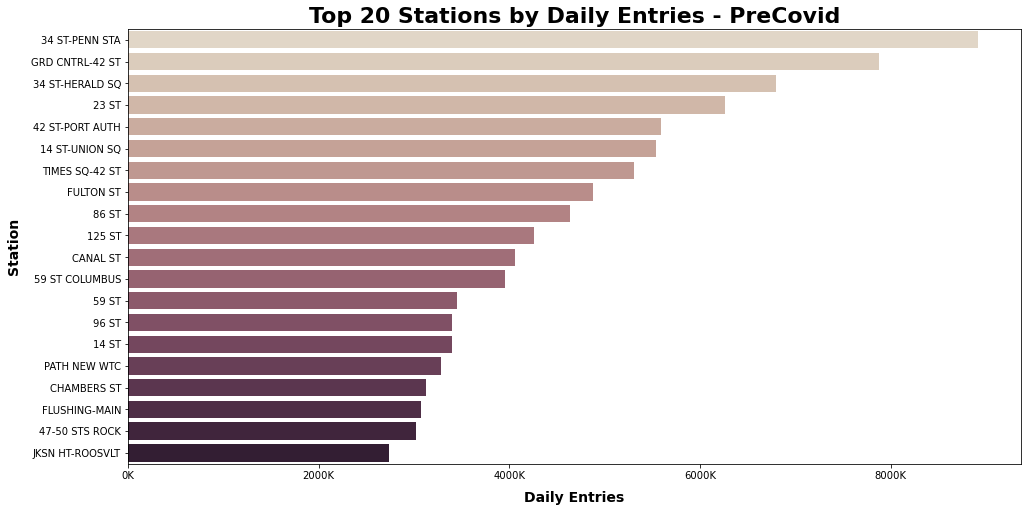

In [104]:
# Top 20 Stations by Daily Entries - PreCovid
plt.figure(figsize=(16,8))
chart = sns.barplot(x='DAILY_ENTRIES', y='STATION', data=precovid_station_totals.head(20),
            order=precovid_station_totals['STATION'].head(20), palette='ch:.25')
xlabels = [str(int(x))+'K' for x in chart.get_xticks()/1000]
chart.set_xticklabels(xlabels)
chart.set_ylabel('Station', fontsize=14, fontweight='bold', labelpad=10)
chart.set_xlabel('Daily Entries', fontsize=14, fontweight='bold',labelpad=10)
plt.title('Top 20 Stations by Daily Entries - PreCovid', fontsize=22, fontweight='bold')
plt.show()
# code from https://github.com/drwismer/metis_EDA_module/blob/main/mta_turnstile_EDA_final.ipynb

/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/564082450.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(xlabels)


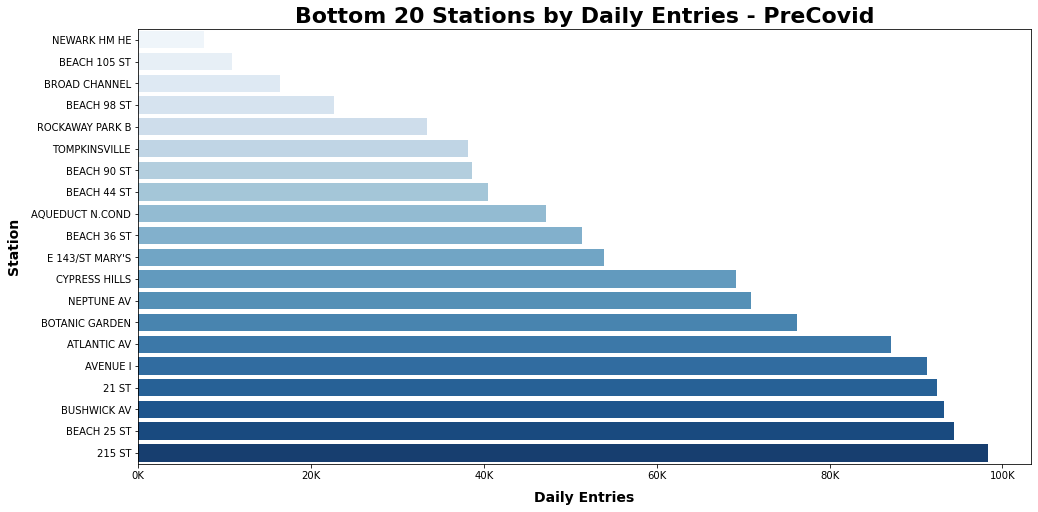

In [105]:
# Bottom 20 Stations by Daily Entries - PreCovid
plt.figure(figsize=(16,8))
chart = sns.barplot(x='DAILY_ENTRIES', y='STATION', data=precovid_station_totals.tail(20)[::-1],
            order=precovid_station_totals['STATION'].tail(20)[::-1], palette='Blues')
xlabels = [str(int(x))+'K' for x in chart.get_xticks()/1000]
chart.set_xticklabels(xlabels)
chart.set_ylabel('Station', fontsize=14, fontweight='bold', labelpad=10)
chart.set_xlabel('Daily Entries', fontsize=14, fontweight='bold',labelpad=10)
plt.title('Bottom 20 Stations by Daily Entries - PreCovid', fontsize=22, fontweight='bold')
plt.show()

/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/2951647694.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(xlabels)


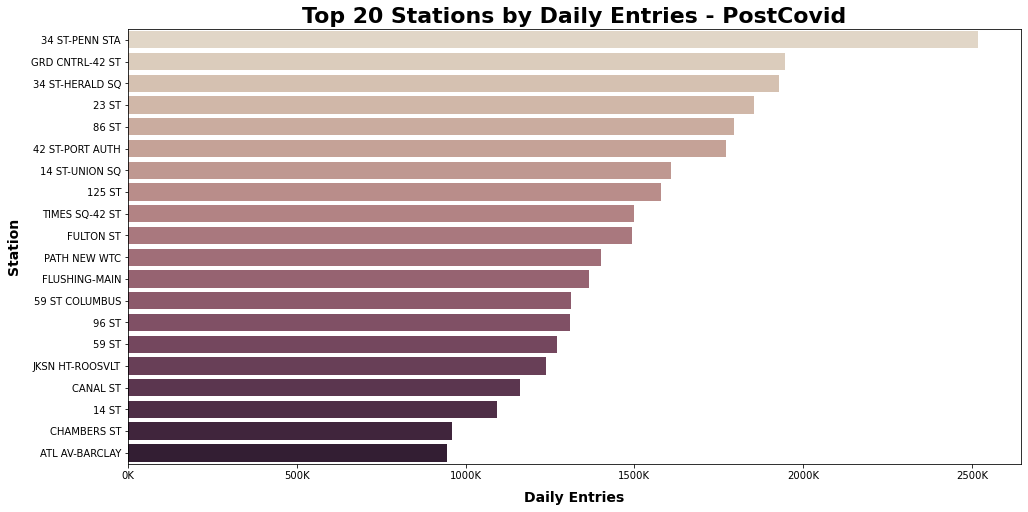

In [106]:
# Top 20 Stations by Daily Entries - PostCovid
plt.figure(figsize=(16,8))
chart = sns.barplot(x='DAILY_ENTRIES', y='STATION', data=postcovid_station_totals.head(20),
            order=postcovid_station_totals['STATION'].head(20), palette='ch:.25')
xlabels = [str(int(x))+'K' for x in chart.get_xticks()/1000]
chart.set_xticklabels(xlabels)
chart.set_ylabel('Station', fontsize=14, fontweight='bold', labelpad=10)
chart.set_xlabel('Daily Entries', fontsize=14, fontweight='bold',labelpad=10)
plt.title('Top 20 Stations by Daily Entries - PostCovid', fontsize=22, fontweight='bold')
plt.show()

/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/2388709177.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(xlabels)


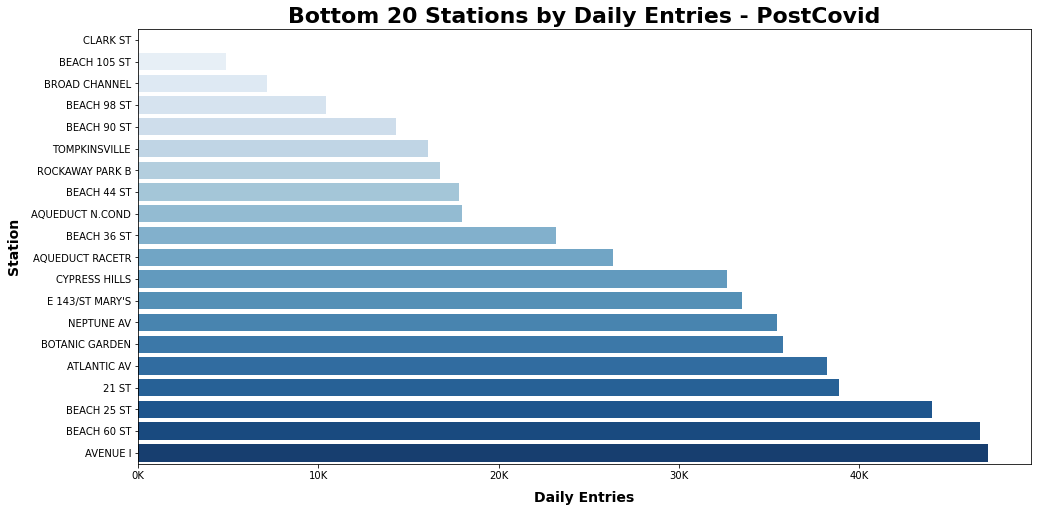

In [107]:
# Bottom 20 Stations by Daily Entries - PostCovid
plt.figure(figsize=(16,8))
chart = sns.barplot(x='DAILY_ENTRIES', y='STATION', data=postcovid_station_totals.tail(20)[::-1],
            order=postcovid_station_totals['STATION'].tail(20)[::-1], palette='Blues')
xlabels = [str(int(x))+'K' for x in chart.get_xticks()/1000]
chart.set_xticklabels(xlabels)
chart.set_ylabel('Station', fontsize=14, fontweight='bold', labelpad=10)
chart.set_xlabel('Daily Entries', fontsize=14, fontweight='bold',labelpad=10)
plt.title('Bottom 20 Stations by Daily Entries - PostCovid', fontsize=22, fontweight='bold')
plt.show()

In [54]:
final_station_totals = precovid_station_totals.merge(postcovid_station_totals, 
                                                     on = 'STATION', suffixes=('_PRE','_POST'))
final_station_totals.set_index('STATION', inplace = True)
final_station_totals.head()
# this table is for stations that had highest traffic pre covid

,DAILY_ENTRIES_PRE,DAILY_ENTRIES_POST
STATION,,
34 ST-PENN STA,8921716.0,2519526.0
GRD CNTRL-42 ST,7881744.0,1946420.0
34 ST-HERALD SQ,6796144.0,1929981.0
23 ST,6259232.0,1853719.0
42 ST-PORT AUTH,5594978.0,1772991.0


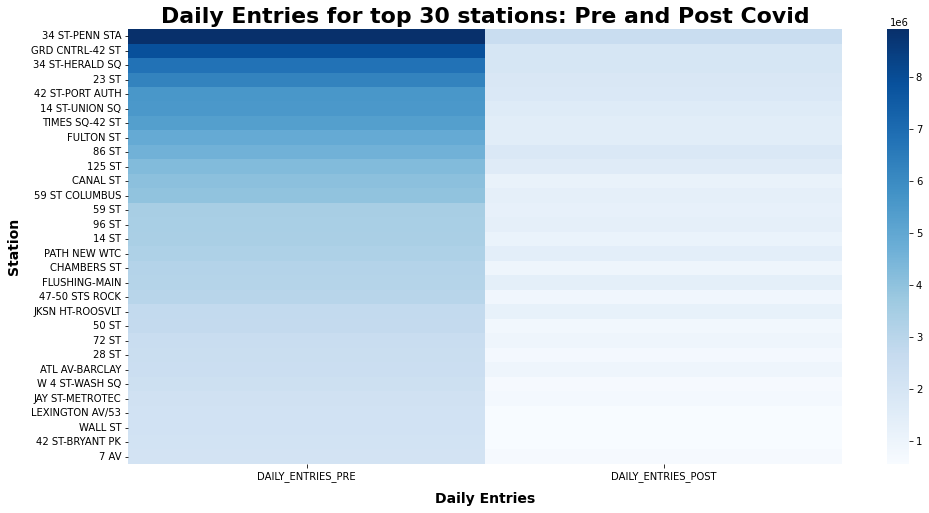

In [109]:
chart = final_station_totals.head(30)
plt.figure(figsize = [16,8])
sns.heatmap(chart, cmap = "Blues");
plt.xlabel('Daily Entries', fontsize=14, fontweight='bold',labelpad=10)
plt.ylabel('Station', fontsize=14, fontweight='bold', labelpad=10)
plt.title('Daily Entries for top 30 stations: Pre and Post Covid', fontsize=22, fontweight='bold');

Text(0.5, 1.0, 'Daily Entries for top 10 stations pre covid')

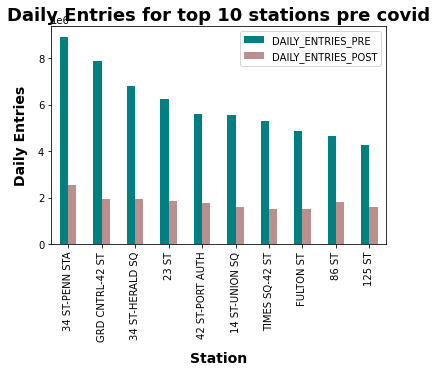

In [111]:
chart = final_station_totals.head(10)
chart.plot(kind='bar', stacked=False, color=['teal', 'rosybrown'])
plt.xlabel('Station', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Daily Entries', fontsize=14, fontweight='bold',labelpad=10)
plt.title('Daily Entries for top 10 stations pre covid', fontsize=18, fontweight='bold')

<AxesSubplot:>

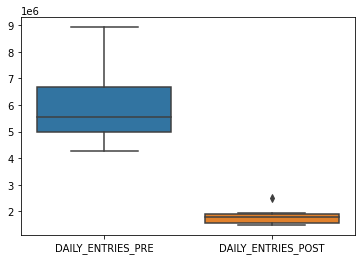

In [57]:
sns.boxplot(data = final_station_totals.head(10))

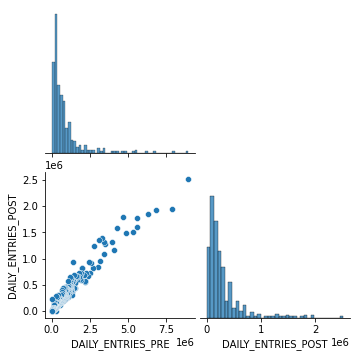

In [58]:
sns.pairplot(data = final_station_totals, corner = True)

In [80]:
final_station_declines = final_station_totals.copy()
final_station_declines.reset_index(inplace = True)
final_station_declines['DECLINE']= final_station_declines['DAILY_ENTRIES_PRE']-final_station_declines['DAILY_ENTRIES_POST']
final_station_declines['DECLINE_PERC']= (final_station_declines['DECLINE']/final_station_declines['DAILY_ENTRIES_PRE'])*100
final_station_declines.head()

,STATION,DAILY_ENTRIES_PRE,DAILY_ENTRIES_POST,DECLINE,DECLINE_PERC
0,34 ST-PENN STA,8921716.0,2519526.0,6402190.0,71.759626
1,GRD CNTRL-42 ST,7881744.0,1946420.0,5935324.0,75.304704
2,34 ST-HERALD SQ,6796144.0,1929981.0,4866163.0,71.601823
3,23 ST,6259232.0,1853719.0,4405513.0,70.384242
4,42 ST-PORT AUTH,5594978.0,1772991.0,3821987.0,68.311028


In [103]:
perc_sort = final_station_declines.sort_values('DECLINE_PERC', ascending = False)
abs_sort = final_station_declines.sort_values('DECLINE', ascending = False)


/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/242442617.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(xlabels)


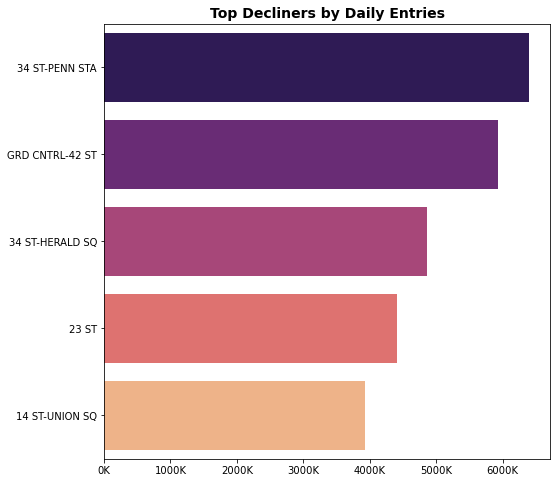

In [171]:

plt.figure(figsize=(8,8))
chart = sns.barplot(x='DECLINE', y='STATION', data=abs_sort.head(5),
                 order=abs_sort['STATION'].head(5), palette='magma')
xlabels = [str(int(x))+'K' for x in chart.get_xticks()/1000]
chart.set_xticklabels(xlabels)
chart.set_ylabel('')
chart.set_xlabel('')
plt.title('Top Decliners by Daily Entries', fontsize=14, fontweight='bold')

plt.show()
# code from https://github.com/drwismer/metis_EDA_module/blob/main/mta_turnstile_EDA_final.ipynb

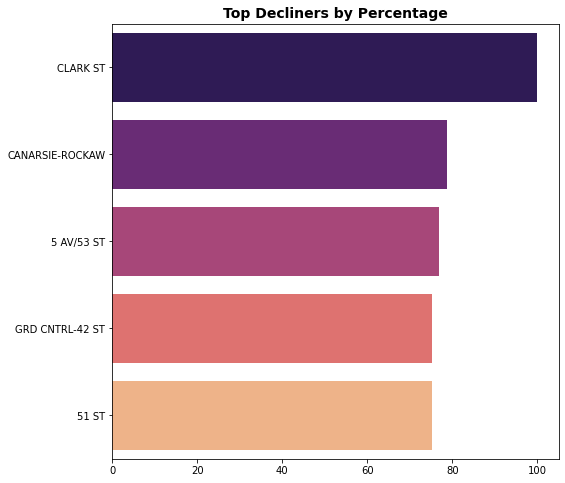

In [87]:

plt.figure(figsize=(8,8))
chart = sns.barplot(x='DECLINE_PERC', y='STATION', data=perc_sort.head(5),
                 order=perc_sort['STATION'].head(5), palette='magma')
chart.set_ylabel('')
chart.set_xlabel('')
plt.title('Top Decliners by Percentage', fontsize=14, fontweight='bold')

plt.show()
#code from https://github.com/drwismer/metis_EDA_module/blob/main/mta_turnstile_EDA_final.ipynb

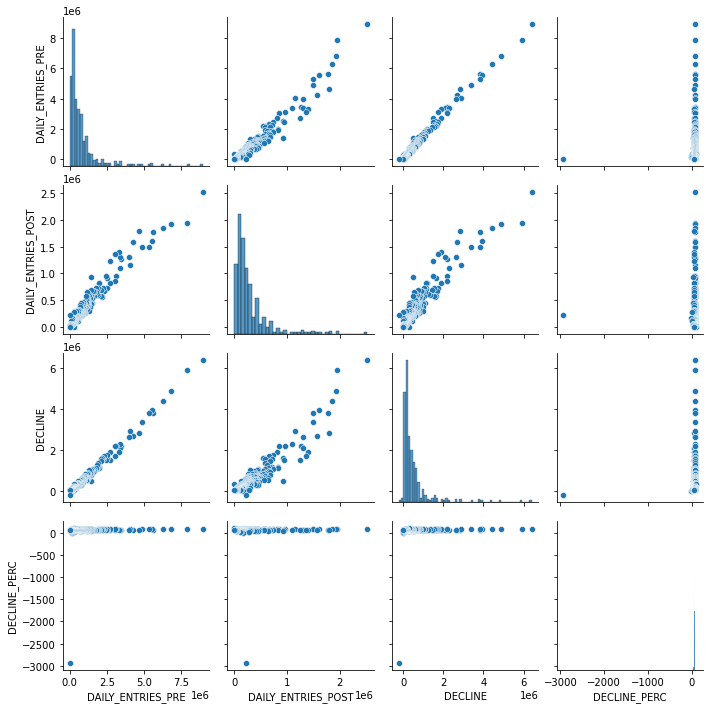

In [84]:
sns.pairplot(data = final_station_declines)

In [64]:
precovid_station_daily_34_penn = precovid_station_daily[precovid_station_daily['STATION'] == '34 ST-PENN STA']
precovid_station_daily_34_penn.head()

,STATION,DATE,DAILY_ENTRIES
3780,34 ST-PENN STA,2019-01-27,72374.0
3781,34 ST-PENN STA,2019-01-28,154712.0
3782,34 ST-PENN STA,2019-01-29,116001.0
3783,34 ST-PENN STA,2019-01-30,177569.0
3784,34 ST-PENN STA,2019-01-31,193046.0


In [65]:
postcovid_station_daily_34_penn = postcovid_station_daily[postcovid_station_daily['STATION'] == '34 ST-PENN STA']
postcovid_station_daily_34_penn.head()

,STATION,DATE,DAILY_ENTRIES
3355,34 ST-PENN STA,2022-01-30,13300.0
3356,34 ST-PENN STA,2022-01-31,37920.0
3357,34 ST-PENN STA,2022-02-01,47995.0
3358,34 ST-PENN STA,2022-02-02,34268.0
3359,34 ST-PENN STA,2022-02-03,51056.0


Text(0.5, 1.0, 'Daily Entries for 34 ST-PENN Station - Precovid')

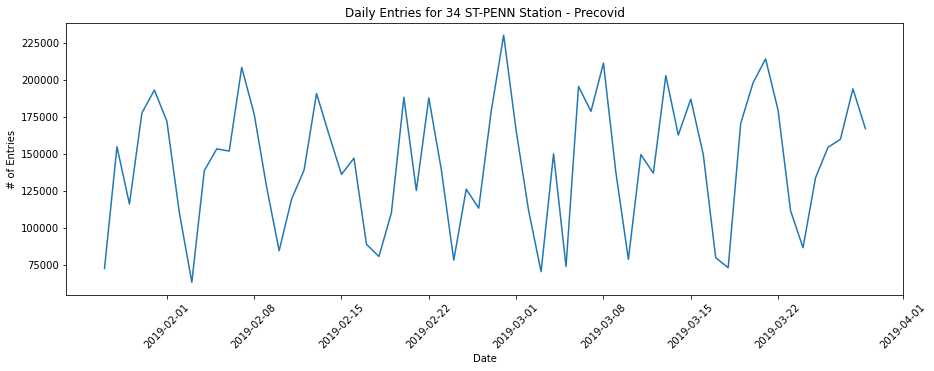

In [66]:
plt.figure(figsize=(15,5))
plt.plot(precovid_station_daily_34_penn['DATE'], precovid_station_daily_34_penn['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for 34 ST-PENN Station - Precovid')

Text(0.5, 1.0, 'Daily Entries for 34 ST-PENN Station - Postcovid')

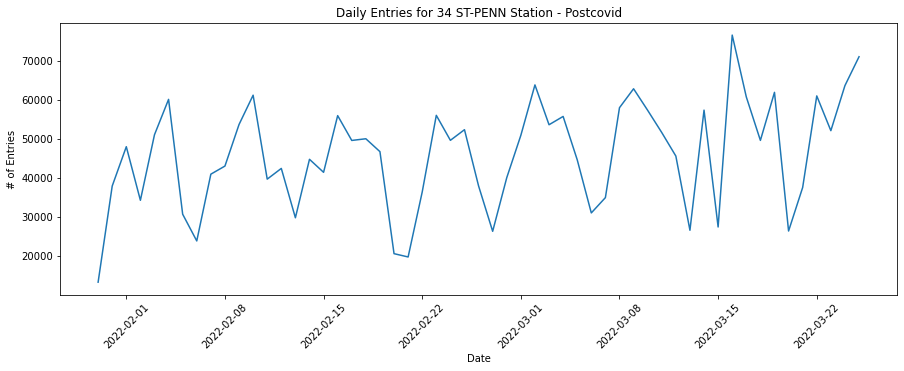

In [67]:
plt.figure(figsize=(15,5))
plt.plot(postcovid_station_daily_34_penn['DATE'], postcovid_station_daily_34_penn['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for 34 ST-PENN Station - Postcovid')

In [68]:
precovid_station_daily_34_penn['ABBR_DATE']= precovid_station_daily_34_penn['DATE'].dt.strftime('%m-%d')
precovid_station_daily_34_penn.head()                                                                         

/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/3801806964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precovid_station_daily_34_penn['ABBR_DATE']= precovid_station_daily_34_penn['DATE'].dt.strftime('%m-%d')


,STATION,DATE,DAILY_ENTRIES,ABBR_DATE
3780,34 ST-PENN STA,2019-01-27,72374.0,01-27
3781,34 ST-PENN STA,2019-01-28,154712.0,01-28
3782,34 ST-PENN STA,2019-01-29,116001.0,01-29
3783,34 ST-PENN STA,2019-01-30,177569.0,01-30
3784,34 ST-PENN STA,2019-01-31,193046.0,01-31


In [69]:
postcovid_station_daily_34_penn['ABBR_DATE']= postcovid_station_daily_34_penn['DATE'].dt.strftime('%m-%d')
postcovid_station_daily_34_penn.head()  

/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/1944171802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  postcovid_station_daily_34_penn['ABBR_DATE']= postcovid_station_daily_34_penn['DATE'].dt.strftime('%m-%d')


,STATION,DATE,DAILY_ENTRIES,ABBR_DATE
3355,34 ST-PENN STA,2022-01-30,13300.0,01-30
3356,34 ST-PENN STA,2022-01-31,37920.0,01-31
3357,34 ST-PENN STA,2022-02-01,47995.0,02-01
3358,34 ST-PENN STA,2022-02-02,34268.0,02-02
3359,34 ST-PENN STA,2022-02-03,51056.0,02-03


Text(0.5, 1.0, 'Daily Entries for 34 ST-PENN Station')

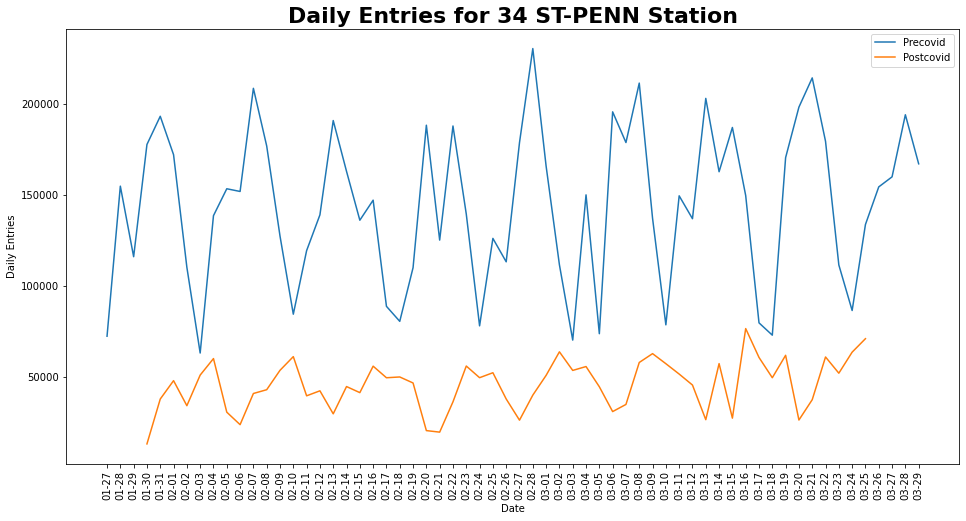

In [148]:
plt.figure(figsize=(16,8))
plt.plot(precovid_station_daily_34_penn['ABBR_DATE'], precovid_station_daily_34_penn['DAILY_ENTRIES'])
plt.plot(postcovid_station_daily_34_penn['ABBR_DATE'], postcovid_station_daily_34_penn['DAILY_ENTRIES'])
plt.ylabel('Daily Entries')
#plt.xticks(color='w')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.legend(["Precovid", "Postcovid"], loc=0)
plt.title('Daily Entries for 34 ST-PENN Station', fontsize=22, fontweight='bold')

In [73]:
precovid_station_daily_34_penn['DAY_OF_WEEK_NUM'] = pd.to_datetime(precovid_station_daily_34_penn['DATE']).dt.dayofweek
precovid_station_daily_34_penn['WEEK_OF_YEAR'] = pd.to_datetime(precovid_station_daily_34_penn['DATE']).dt.week
precovid_station_daily_34_penn.head()
# code from Metis Bootcamp MTA exercise

/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/4143969798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precovid_station_daily_34_penn['DAY_OF_WEEK_NUM'] = pd.to_datetime(precovid_station_daily_34_penn['DATE']).dt.dayofweek
/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/4143969798.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  precovid_station_daily_34_penn['WEEK_OF_YEAR'] = pd.to_datetime(precovid_station_daily_34_penn['DATE']).dt.week
/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/4143969798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,STATION,DATE,DAILY_ENTRIES,ABBR_DATE,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
3780,34 ST-PENN STA,2019-01-27,72374.0,01-27,6,4
3781,34 ST-PENN STA,2019-01-28,154712.0,01-28,0,5
3782,34 ST-PENN STA,2019-01-29,116001.0,01-29,1,5
3783,34 ST-PENN STA,2019-01-30,177569.0,01-30,2,5
3784,34 ST-PENN STA,2019-01-31,193046.0,01-31,3,5


Text(0.5, 1.0, 'Precovid Ridership per day for 34 ST-PENN station')

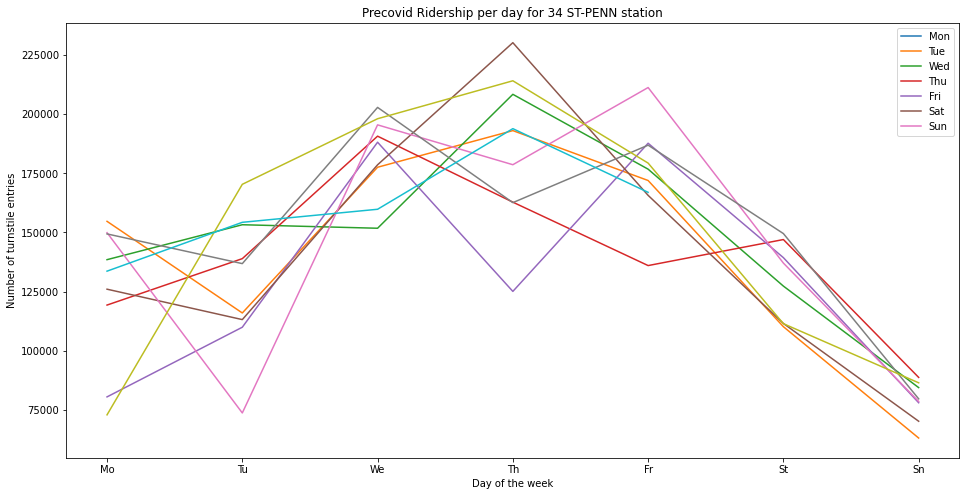

In [159]:
plt.figure(figsize=(16,8))
for i, group in precovid_station_daily_34_penn.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    

plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.legend(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], loc=0)
plt.title('Precovid Ridership per day for 34 ST-PENN station')
# code from Metis Bootcamp MTA exercise

In [75]:
postcovid_station_daily_34_penn['DAY_OF_WEEK_NUM'] = pd.to_datetime(postcovid_station_daily_34_penn['DATE']).dt.dayofweek
postcovid_station_daily_34_penn['WEEK_OF_YEAR'] = pd.to_datetime(postcovid_station_daily_34_penn['DATE']).dt.week
postcovid_station_daily_34_penn.head()
# code from Metis Bootcamp MTA exercise

/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/136695084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  postcovid_station_daily_34_penn['DAY_OF_WEEK_NUM'] = pd.to_datetime(postcovid_station_daily_34_penn['DATE']).dt.dayofweek
/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/136695084.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  postcovid_station_daily_34_penn['WEEK_OF_YEAR'] = pd.to_datetime(postcovid_station_daily_34_penn['DATE']).dt.week
/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/136695084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,STATION,DATE,DAILY_ENTRIES,ABBR_DATE,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
3355,34 ST-PENN STA,2022-01-30,13300.0,01-30,6,4
3356,34 ST-PENN STA,2022-01-31,37920.0,01-31,0,5
3357,34 ST-PENN STA,2022-02-01,47995.0,02-01,1,5
3358,34 ST-PENN STA,2022-02-02,34268.0,02-02,2,5
3359,34 ST-PENN STA,2022-02-03,51056.0,02-03,3,5


Text(0.5, 1.0, 'Postcovid Ridership per day for 34 ST-PENN station')

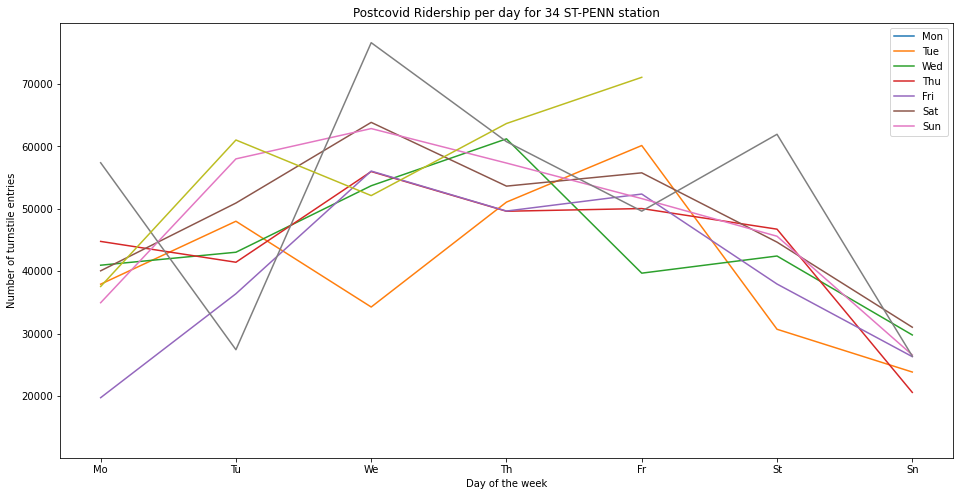

In [160]:
plt.figure(figsize=(16,8))
for i, group in postcovid_station_daily_34_penn.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.legend(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], loc = 1)
plt.title('Postcovid Ridership per day for 34 ST-PENN station')
# code from Metis Bootcamp MTA exercise

In [113]:
precovid_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2019-01-27,6924085,2019-01-26,6922652.0,1433.0
2,A002,R051,02-00-00,59 ST,2019-01-28,6924101,2019-01-27,6924085.0,16.0
3,A002,R051,02-00-00,59 ST,2019-01-29,6926895,2019-01-28,6924101.0,2794.0
4,A002,R051,02-00-00,59 ST,2019-01-30,6926916,2019-01-29,6926895.0,21.0
5,A002,R051,02-00-00,59 ST,2019-01-31,6928244,2019-01-30,6926916.0,1328.0


In [114]:
postcovid_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2022-01-30,7682542,2022-01-29,7682443.0,99.0
2,A002,R051,02-00-00,59 ST,2022-01-31,7682667,2022-01-30,7682542.0,125.0
3,A002,R051,02-00-00,59 ST,2022-02-01,7682993,2022-01-31,7682667.0,326.0
4,A002,R051,02-00-00,59 ST,2022-02-02,7683246,2022-02-01,7682993.0,253.0
5,A002,R051,02-00-00,59 ST,2022-02-03,7683916,2022-02-02,7683246.0,670.0


In [116]:
from pandas.api.types import CategoricalDtype
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

precovid_daily['DAY_OF_WEEK_NUM'] = precovid_daily["DATE"].apply(lambda x: x.weekday())
precovid_daily['DAY_OF_WEEK'] = precovid_daily["DAY_OF_WEEK_NUM"].apply(lambda x: weekdays[x]).astype(
    CategoricalDtype(weekdays, ordered=True))
precovid_daily['DAY_OF_WEEK_SUMMARY'] = precovid_daily["DAY_OF_WEEK_NUM"].apply(lambda x: "Weekend" if int(x) >= 5 else "Weekday")
precovid_daily.head()
# code from https://github.com/alohajenny/Exploratory-Data-Analysis-On-MTA-Turnstile-Data/blob/master/EDA.ipynb

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY_OF_WEEK_NUM,DAY_OF_WEEK,DAY_OF_WEEK_SUMMARY
1,A002,R051,02-00-00,59 ST,2019-01-27,6924085,2019-01-26,6922652.0,1433.0,6,Sunday,Weekend
2,A002,R051,02-00-00,59 ST,2019-01-28,6924101,2019-01-27,6924085.0,16.0,0,Monday,Weekday
3,A002,R051,02-00-00,59 ST,2019-01-29,6926895,2019-01-28,6924101.0,2794.0,1,Tuesday,Weekday
4,A002,R051,02-00-00,59 ST,2019-01-30,6926916,2019-01-29,6926895.0,21.0,2,Wednesday,Weekday
5,A002,R051,02-00-00,59 ST,2019-01-31,6928244,2019-01-30,6926916.0,1328.0,3,Thursday,Weekday


In [119]:
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

postcovid_daily['DAY_OF_WEEK_NUM'] = postcovid_daily["DATE"].apply(lambda x: x.weekday())
postcovid_daily['DAY_OF_WEEK'] = postcovid_daily["DAY_OF_WEEK_NUM"].apply(lambda x: weekdays[x]).astype(
    CategoricalDtype(weekdays, ordered=True))
postcovid_daily['DAY_OF_WEEK_SUMMARY'] = postcovid_daily["DAY_OF_WEEK_NUM"].apply(lambda x: "Weekend" if int(x) >= 5 else "Weekday")
postcovid_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY_OF_WEEK_NUM,DAY_OF_WEEK,DAY_OF_WEEK_SUMMARY
1,A002,R051,02-00-00,59 ST,2022-01-30,7682542,2022-01-29,7682443.0,99.0,6,Sunday,Weekend
2,A002,R051,02-00-00,59 ST,2022-01-31,7682667,2022-01-30,7682542.0,125.0,0,Monday,Weekday
3,A002,R051,02-00-00,59 ST,2022-02-01,7682993,2022-01-31,7682667.0,326.0,1,Tuesday,Weekday
4,A002,R051,02-00-00,59 ST,2022-02-02,7683246,2022-02-01,7682993.0,253.0,2,Wednesday,Weekday
5,A002,R051,02-00-00,59 ST,2022-02-03,7683916,2022-02-02,7683246.0,670.0,3,Thursday,Weekday


In [121]:
precovid_station_weekly = precovid_daily.groupby(["STATION", "DAY_OF_WEEK_SUMMARY"])[['DAILY_ENTRIES']].sum().reset_index()
precovid_station_weekly.head()
# weekly time series for each STATION, by adding up all the turnstiles in a station in precovid df

,STATION,DAY_OF_WEEK_SUMMARY,DAILY_ENTRIES
0,1 AV,Weekday,774509.0
1,1 AV,Weekend,133431.0
2,103 ST,Weekday,1275957.0
3,103 ST,Weekend,353913.0
4,103 ST-CORONA,Weekday,865379.0


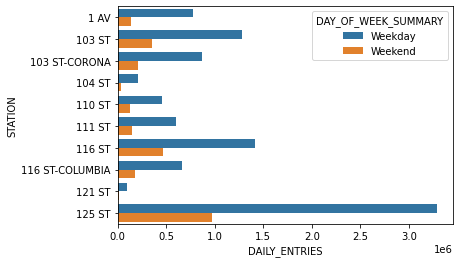

In [123]:
sns.barplot(x = 'DAILY_ENTRIES',
            y = 'STATION',
            hue = 'DAY_OF_WEEK_SUMMARY',
            data = precovid_station_weekly.head(20))
 
# Show the plot
plt.show()

In [125]:
precovid_station_weekend = precovid_station_weekly[precovid_station_weekly['DAY_OF_WEEK_SUMMARY']=='Weekend']
precovid_station_weekend.sort_values('DAILY_ENTRIES', ascending=False, inplace = True)
precovid_station_weekend.head()

/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/132730127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precovid_station_weekend.sort_values('DAILY_ENTRIES', ascending=False, inplace = True)


,STATION,DAY_OF_WEEK_SUMMARY,DAILY_ENTRIES
123,34 ST-PENN STA,Weekend,1735537.0
119,34 ST-HERALD SQ,Weekend,1471789.0
467,GRD CNTRL-42 ST,Weekend,1462183.0
29,14 ST-UNION SQ,Weekend,1318433.0
137,42 ST-PORT AUTH,Weekend,1248834.0


In [127]:
precovid_station_weekday = precovid_station_weekly[precovid_station_weekly['DAY_OF_WEEK_SUMMARY']=='Weekday']
precovid_station_weekday.sort_values('DAILY_ENTRIES', ascending=False, inplace = True)
precovid_station_weekday.head()

/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/3999096913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precovid_station_weekday.sort_values('DAILY_ENTRIES', ascending=False, inplace = True)


,STATION,DAY_OF_WEEK_SUMMARY,DAILY_ENTRIES
122,34 ST-PENN STA,Weekday,7186179.0
466,GRD CNTRL-42 ST,Weekday,6419561.0
118,34 ST-HERALD SQ,Weekday,5324355.0
92,23 ST,Weekday,5046303.0
136,42 ST-PORT AUTH,Weekday,4346144.0


In [122]:
postcovid_station_weekly = postcovid_daily.groupby(["STATION", "DAY_OF_WEEK_SUMMARY"])[['DAILY_ENTRIES']].sum().reset_index()
postcovid_station_weekly.head()
# weekly time series for each STATION, by adding up all the turnstiles in a station in postcovid df

,STATION,DAY_OF_WEEK_SUMMARY,DAILY_ENTRIES
0,1 AV,Weekday,336990.0
1,1 AV,Weekend,93034.0
2,103 ST,Weekday,532645.0
3,103 ST,Weekend,128670.0
4,103 ST-CORONA,Weekday,450898.0


In [126]:
postcovid_station_weekend = postcovid_station_weekly[postcovid_station_weekly['DAY_OF_WEEK_SUMMARY']=='Weekend']
postcovid_station_weekend.sort_values('DAILY_ENTRIES', ascending=False, inplace = True)
postcovid_station_weekend.head()

/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/2336169876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  postcovid_station_weekend.sort_values('DAILY_ENTRIES', ascending=False, inplace = True)


,STATION,DAY_OF_WEEK_SUMMARY,DAILY_ENTRIES
123,34 ST-PENN STA,Weekend,507888.0
119,34 ST-HERALD SQ,Weekend,445036.0
137,42 ST-PORT AUTH,Weekend,396481.0
93,23 ST,Weekend,364452.0
221,86 ST,Weekend,354397.0


In [128]:
postcovid_station_weekday = postcovid_station_weekly[postcovid_station_weekly['DAY_OF_WEEK_SUMMARY']=='Weekday']
postcovid_station_weekday.sort_values('DAILY_ENTRIES', ascending=False, inplace = True)
postcovid_station_weekday.head()

/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/121267878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  postcovid_station_weekday.sort_values('DAILY_ENTRIES', ascending=False, inplace = True)


,STATION,DAY_OF_WEEK_SUMMARY,DAILY_ENTRIES
122,34 ST-PENN STA,Weekday,2011638.0
466,GRD CNTRL-42 ST,Weekday,1615606.0
92,23 ST,Weekday,1489267.0
118,34 ST-HERALD SQ,Weekday,1484945.0
220,86 ST,Weekday,1442323.0


/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/1972467660.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(xlabels)


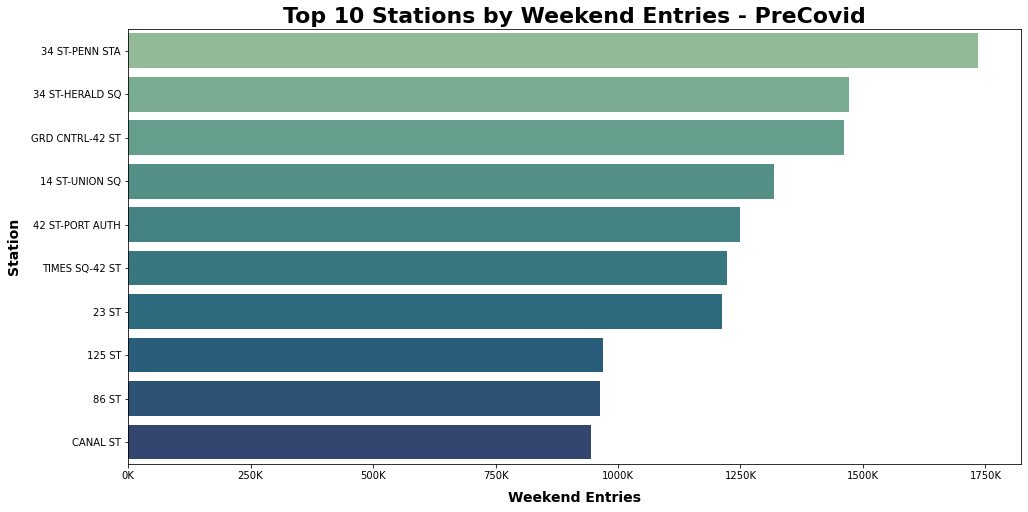

In [134]:
# Top 10 Stations by Weekend Entries - PreCovid
plt.figure(figsize=(16,8))
chart = sns.barplot(x='DAILY_ENTRIES', y='STATION', data=precovid_station_weekend.head(10),
            order=precovid_station_weekend['STATION'].head(10), palette='crest')
xlabels = [str(int(x))+'K' for x in chart.get_xticks()/1000]
chart.set_xticklabels(xlabels)
chart.set_ylabel('Station', fontsize=14, fontweight='bold', labelpad=10)
chart.set_xlabel('Weekend Entries', fontsize=14, fontweight='bold',labelpad=10)
plt.title('Top 10 Stations by Weekend Entries - PreCovid', fontsize=22, fontweight='bold')
plt.show()

/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/3372211523.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(xlabels)


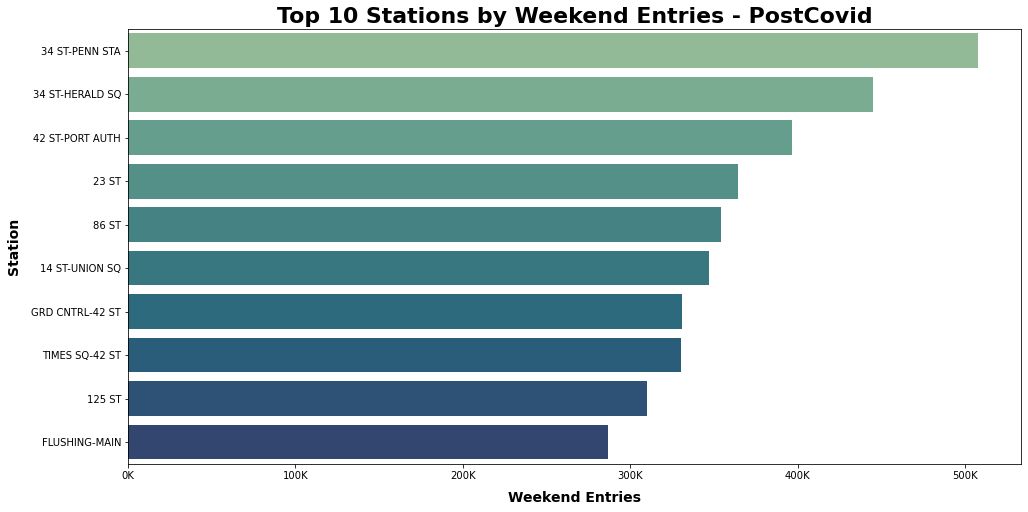

In [136]:
# Top 10 Stations by Weekend Entries - PostCovid
plt.figure(figsize=(16,8))
chart = sns.barplot(x='DAILY_ENTRIES', y='STATION', data=postcovid_station_weekend.head(10),
            order=postcovid_station_weekend['STATION'].head(10), palette='crest')
xlabels = [str(int(x))+'K' for x in chart.get_xticks()/1000]
chart.set_xticklabels(xlabels)
chart.set_ylabel('Station', fontsize=14, fontweight='bold', labelpad=10)
chart.set_xlabel('Weekend Entries', fontsize=14, fontweight='bold',labelpad=10)
plt.title('Top 10 Stations by Weekend Entries - PostCovid', fontsize=22, fontweight='bold')
plt.show()

/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/3390587410.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(xlabels)


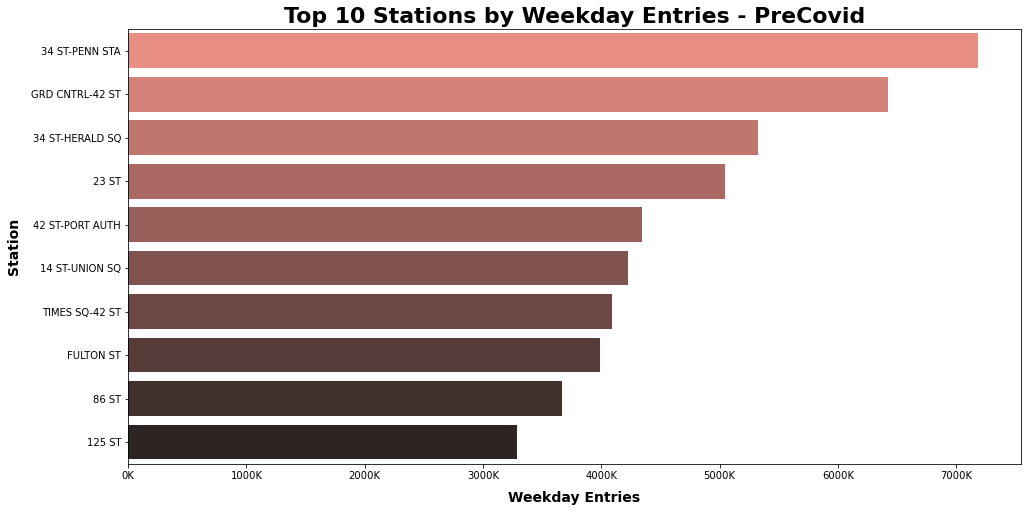

In [135]:
# Top 10 Stations by Weekday Entries - PreCovid
plt.figure(figsize=(16,8))
chart = sns.barplot(x='DAILY_ENTRIES', y='STATION', data=precovid_station_weekday.head(10),
            order=precovid_station_weekday['STATION'].head(10), palette='dark:salmon_r')
xlabels = [str(int(x))+'K' for x in chart.get_xticks()/1000]
chart.set_xticklabels(xlabels)
chart.set_ylabel('Station', fontsize=14, fontweight='bold', labelpad=10)
chart.set_xlabel('Weekday Entries', fontsize=14, fontweight='bold',labelpad=10)
plt.title('Top 10 Stations by Weekday Entries - PreCovid', fontsize=22, fontweight='bold')
plt.show()

/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_8675/16320788.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(xlabels)


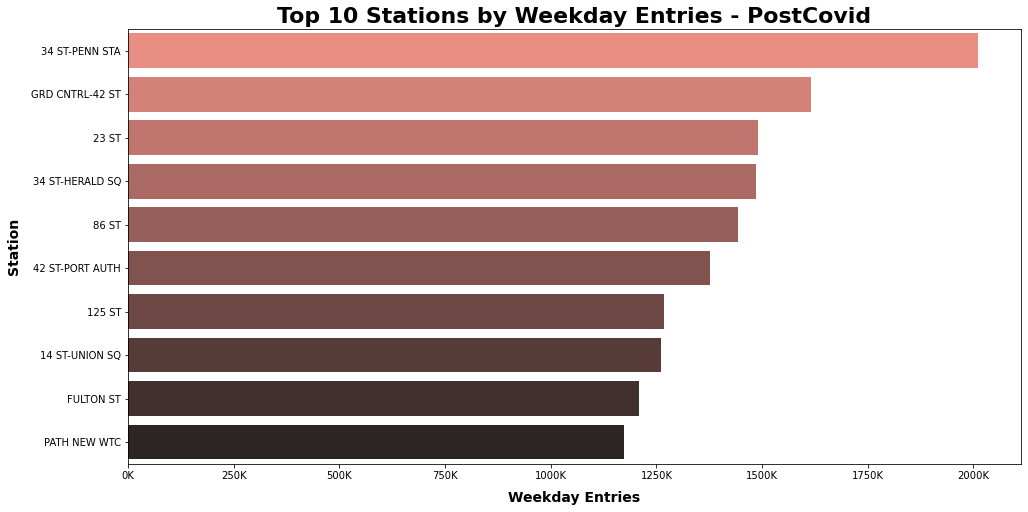

In [137]:
# Top 10 Stations by Weekday Entries - PostCovid
plt.figure(figsize=(16,8))
chart = sns.barplot(x='DAILY_ENTRIES', y='STATION', data=postcovid_station_weekday.head(10),
            order=postcovid_station_weekday['STATION'].head(10), palette='dark:salmon_r')
xlabels = [str(int(x))+'K' for x in chart.get_xticks()/1000]
chart.set_xticklabels(xlabels)
chart.set_ylabel('Station', fontsize=14, fontweight='bold', labelpad=10)
chart.set_xlabel('Weekday Entries', fontsize=14, fontweight='bold',labelpad=10)
plt.title('Top 10 Stations by Weekday Entries - PostCovid', fontsize=22, fontweight='bold')
plt.show()

In [142]:
final_station_weekend = precovid_station_weekend.merge(postcovid_station_weekend, 
                                                     on = 'STATION', suffixes=('_PRE','_POST'))
final_station_weekend.set_index('STATION', inplace = True)
final_station_weekend = final_station_weekend.drop(["DAY_OF_WEEK_SUMMARY_PRE", "DAY_OF_WEEK_SUMMARY_POST"], axis=1, errors="ignore")
final_station_weekend.head()

,DAILY_ENTRIES_PRE,DAILY_ENTRIES_POST
STATION,,
34 ST-PENN STA,1735537.0,507888.0
34 ST-HERALD SQ,1471789.0,445036.0
GRD CNTRL-42 ST,1462183.0,330814.0
14 ST-UNION SQ,1318433.0,346753.0
42 ST-PORT AUTH,1248834.0,396481.0


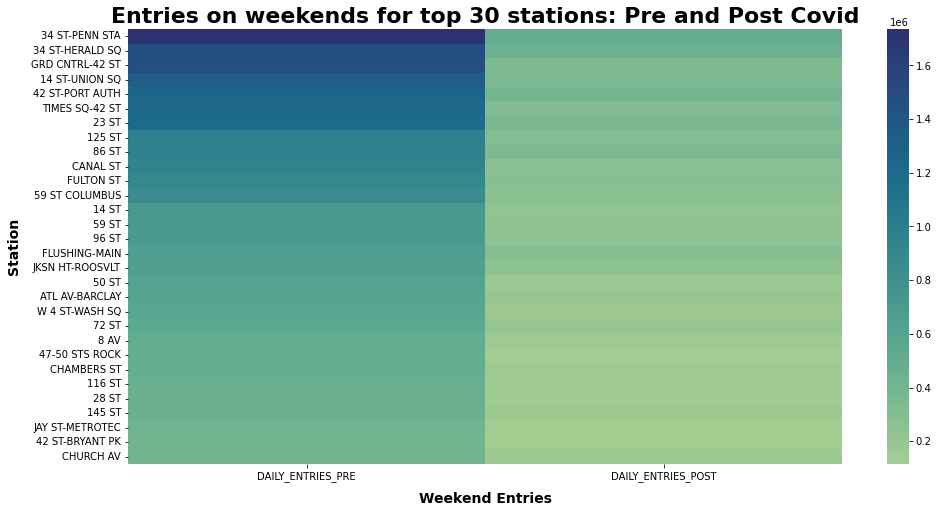

In [164]:
chart = final_station_weekend.head(30)
plt.figure(figsize = [16,8])
sns.heatmap(chart, cmap = "crest");
plt.xlabel('Weekend Entries', fontsize=14, fontweight='bold',labelpad=10)
plt.ylabel('Station', fontsize=14, fontweight='bold', labelpad=10)
plt.title('Entries on weekends for top 30 stations: Pre and Post Covid', fontsize=22, fontweight='bold');

In [166]:
final_station_weekday = precovid_station_weekday.merge(postcovid_station_weekday, 
                                                     on = 'STATION', suffixes=('_PRE','_POST'))
final_station_weekday.set_index('STATION', inplace = True)
final_station_weekday = final_station_weekday.drop(["DAY_OF_WEEK_SUMMARY_PRE", "DAY_OF_WEEK_SUMMARY_POST"], axis=1, errors="ignore")
final_station_weekday.head()

,DAILY_ENTRIES_PRE,DAILY_ENTRIES_POST
STATION,,
34 ST-PENN STA,7186179.0,2011638.0
GRD CNTRL-42 ST,6419561.0,1615606.0
34 ST-HERALD SQ,5324355.0,1484945.0
23 ST,5046303.0,1489267.0
42 ST-PORT AUTH,4346144.0,1376510.0


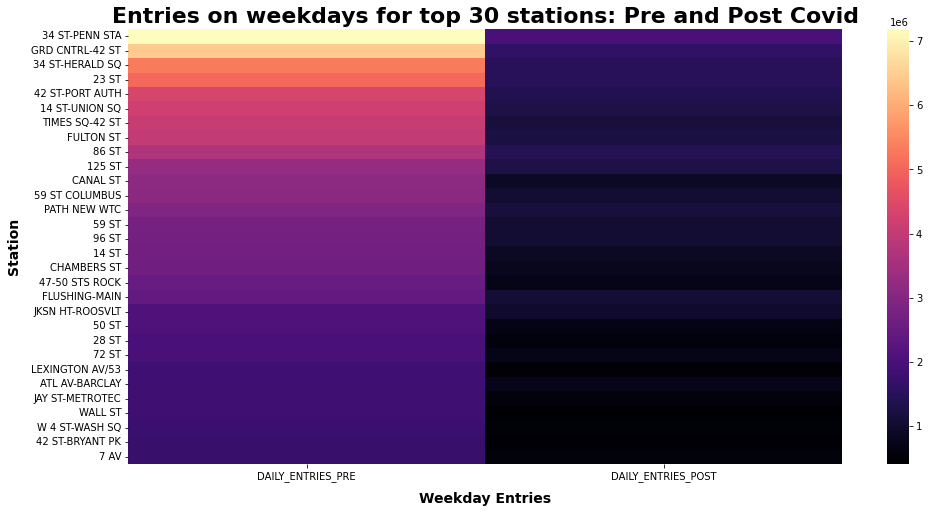

In [167]:
chart = final_station_weekday.head(30)
plt.figure(figsize = [16,8])
sns.heatmap(chart, cmap = "magma");
plt.xlabel('Weekday Entries', fontsize=14, fontweight='bold',labelpad=10)
plt.ylabel('Station', fontsize=14, fontweight='bold', labelpad=10)
plt.title('Entries on weekdays for top 30 stations: Pre and Post Covid', fontsize=22, fontweight='bold');